Take
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])


In [1]:
%pip install pyspedas
%pip install tplot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import io_utils

import pyspedas
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pytplot
import netCDF4
from pytplot import tplot
import seaborn as sns

bplot = 5

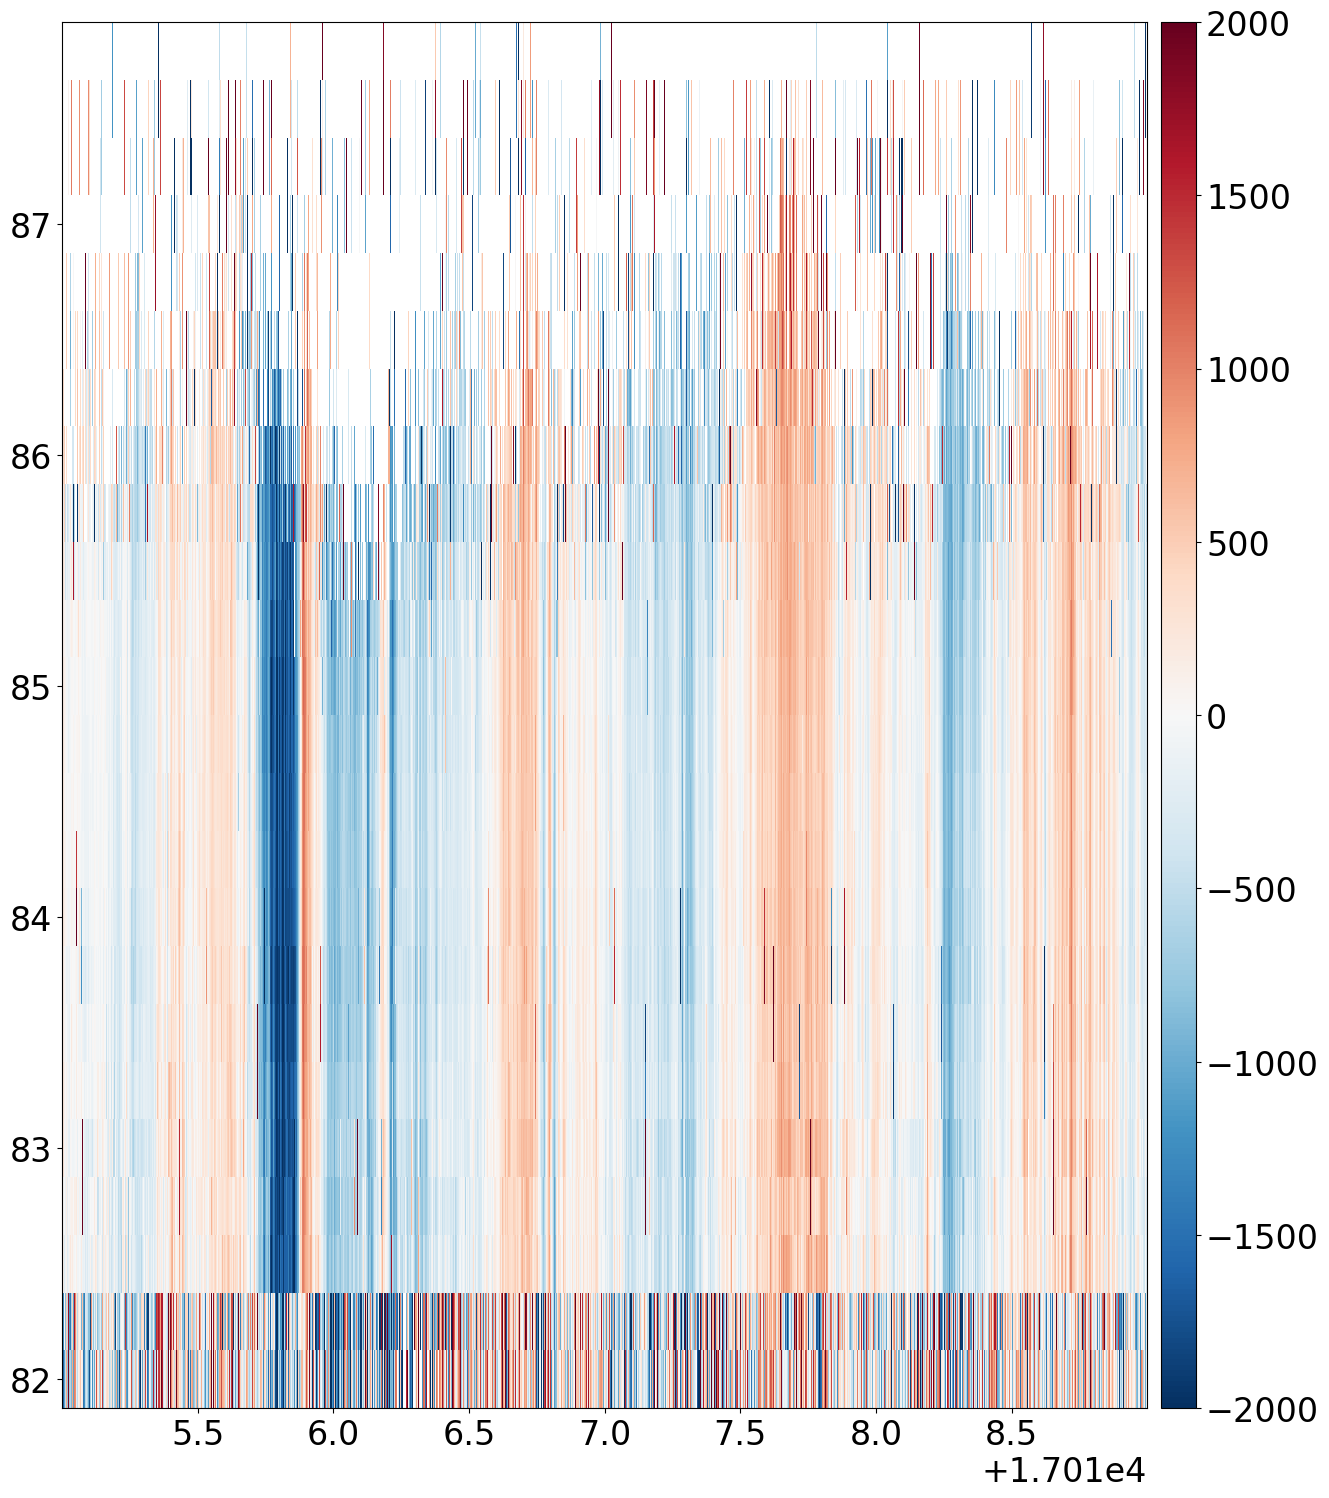

In [3]:
datadir = '/Users/alan/Downloads/AOS99/2016_08_02/'
lpfilename=datadir+'20160802.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20160802.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20160802.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

plt.rcParams['figure.figsize']=14,18
plt.rcParams['font.size']=24
fig,axarr = plt.subplots(1,1,sharex=True)

box3=axarr.get_position()
cbarax3=fig.add_axes([box3.x0+box3.width+0.01, box3.y0, 0.025, box3.height])
vclrs=axarr.pcolormesh(mdates.date2num(dtv),v['/VectorVels']['MagneticLatitude'][:,0],v['/VectorVels']['Vest'][:,:,0].T,vmin=-2000,vmax=2000,cmap='RdBu_r')
cb3=plt.colorbar(vclrs,cax=cbarax3)

In [4]:
print(np.median(v['/VectorVels']['Vest'][:,:,1].T[4:7],axis=0))

[190.3739252  161.8165719  183.02820229 ... 105.86993513  96.0782693
 -14.68503095]


In [5]:
# plt.plot(mdates.date2num(dtv),v['/VectorVels']['MagneticLatitude'][:,0])
# plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T)
# plt.plot(v['/VectorVels']['Vest'][:,:,0].T)
print(v['/VectorVels']['Vest'][:,:,0].T[5])
print(v['/VectorVels']['MagneticLatitude'][:,0][5])

[ 172.73352892  121.96440892  196.890776   ... -175.17653415 -222.2587443
 -187.05111003]
83.25


In [6]:
date = '2016-08-02'
nextdate = '2016-08-03'

bx_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BX_GSE'], notplot =True)
ybx = bx_gsm['BX_GSE']['y']
xbx = bx_gsm['BX_GSE']['x']

by_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BY_GSM'], notplot =True)
yby = by_gsm['BY_GSM']['y']
xby = by_gsm['BY_GSM']['x']

bz_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BZ_GSM'], notplot =True)
ybz = bz_gsm['BZ_GSM']['y']
xbz = bz_gsm['BZ_GSM']['x']

xbx = xbx[(60*24+1):(60*24*2-1)]
ybx = ybx[(60*24+1):(60*24*2-1)]
xby = xby[(60*24+1):(60*24*2-1)]
yby = yby[(60*24+1):(60*24*2-1)]
xbz = xbz[(60*24+1):(60*24*2-1)]
ybz = ybz[(60*24+1):(60*24*2-1)]

ybz = np.interp(x=mdates.date2num(dtac),xp=mdates.date2num(xbz), fp=ybz)
# df4 = pd.DataFrame({'t': dtac, 'ybz':np.interp(x=mdates.date2num(dtac),xp=mdates.date2num(xbz), fp=ybz), 'Vvels':fac['/FittedParams']['Fits'][:,bplot,8,0,-1].T, 'Temps':fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T})

24-Aug-23 11:09:40: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2016/
24-Aug-23 11:09:41: File is current: omni_data/hro2_1min/2016/omni_hro2_1min_20160801_v01.cdf
24-Aug-23 11:09:42: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2016/
24-Aug-23 11:09:42: File is current: omni_data/hro2_1min/2016/omni_hro2_1min_20160801_v01.cdf
24-Aug-23 11:09:43: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2016/
24-Aug-23 11:09:44: File is current: omni_data/hro2_1min/2016/omni_hro2_1min_20160801_v01.cdf


In [7]:
df = pd.read_csv('2016-08-02.csv')
print(df.head())

   Unnamed: 0  index                                 t       ybz  \
0           0      0  2016-08-02 00:01:24.312709+00:00  0.070853   
1           1      1  2016-08-02 00:01:28.187628+00:00  0.056645   
2           2      2  2016-08-02 00:01:32.062546+00:00  0.042437   
3           3      3  2016-08-02 00:01:35.937465+00:00  0.028229   
4           4      4  2016-08-02 00:01:39.812384+00:00  0.014021   

   Vvels_Vest_ns  Vvels_Vest_ew  
0     172.587727     181.573908  
1     168.772963     182.757858  
2     164.958200     183.941807  
3     161.143436     185.125757  
4     157.328672     186.309706  


In [8]:
# plt.plot(dtv,v['/VectorVels']['Vest'][:,:,0].T[5])
# plt.plot(df['t'],df['ybz']*20)
# plt.xlim(min(dtv),max(dtv))

In [9]:
def getData(date,nextdate):
    bx_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BX_GSE'], notplot =True)
    ybx = bx_gsm['BX_GSE']['y']
    xbx = bx_gsm['BX_GSE']['x']

    by_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BY_GSM'], notplot =True)
    yby = by_gsm['BY_GSM']['y']
    xby = by_gsm['BY_GSM']['x']

    bz_gsm = pyspedas.omni.data(trange=[date, nextdate], varnames=['BZ_GSM'], notplot =True)
    ybz = bz_gsm['BZ_GSM']['y']
    xbz = bz_gsm['BZ_GSM']['x']

    xbx = xbx[(60*24+1):(60*24*2-1)]
    ybx = ybx[(60*24+1):(60*24*2-1)]
    xby = xby[(60*24+1):(60*24*2-1)]
    yby = yby[(60*24+1):(60*24*2-1)]
    xbz = xbz[(60*24+1):(60*24*2-1)]
    ybz = ybz[(60*24+1):(60*24*2-1)]

    ybz = np.interp(x=mdates.date2num(dtv),xp=mdates.date2num(xbz), fp=ybz)
    return ybz

# ybz = getData('2015_08_02')
# plt.plot(dtv,v['/VectorVels']['Vest'][:,:,0].T[5])
# plt.plot(df['t'],df['ybz']*20)
# plt.xlim(min(dtv),max(dtv))

87246
87246
87246
87246
87246


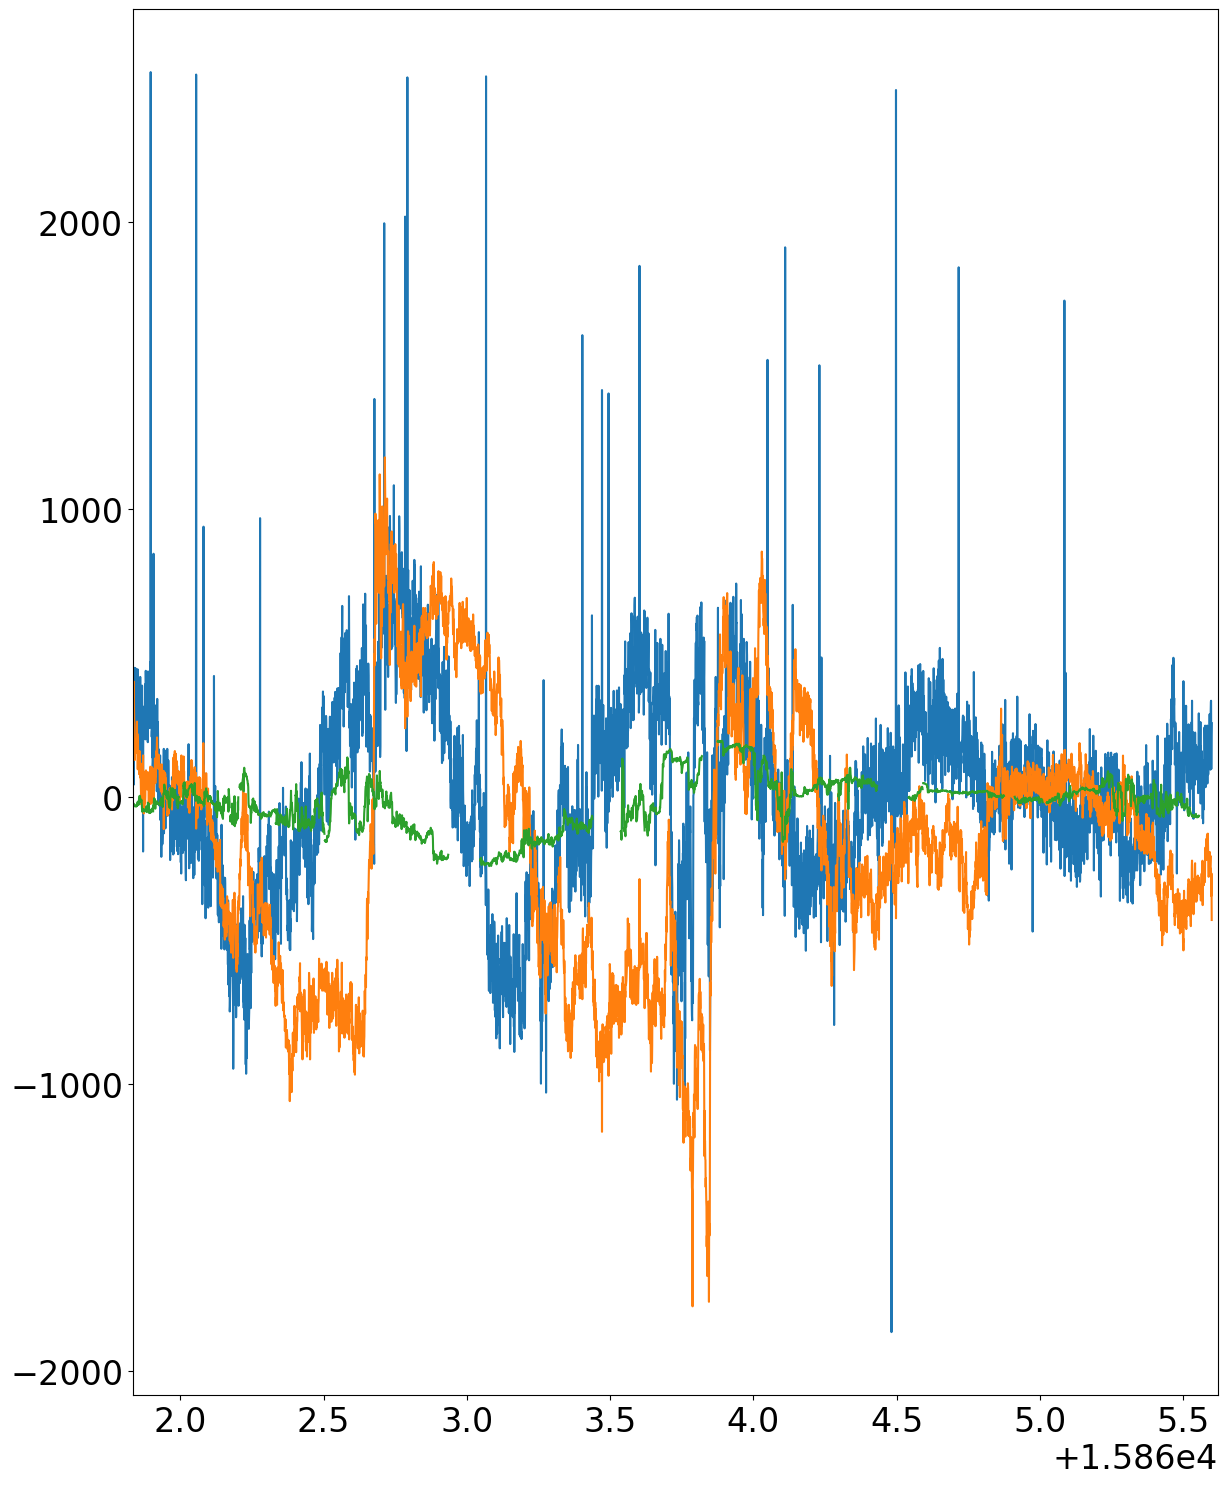

In [10]:
datadir = '/Users/alan/Downloads/AOS99/2013_06_05/'
lpfilename=datadir+'20130605.001_lp_1min-cal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20130605.001_ac_3min-cal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20130605.001_lp_1min-vvelsLat-geo-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2013-06-05.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
# plt.plot(mdates.date2num(dtac),fac['/FittedParams']['Fits'][:,bplot,8,-1,1].T)
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)

df2.to_csv('2013-06-05.csv')

84468
84468
84468
84468
84468


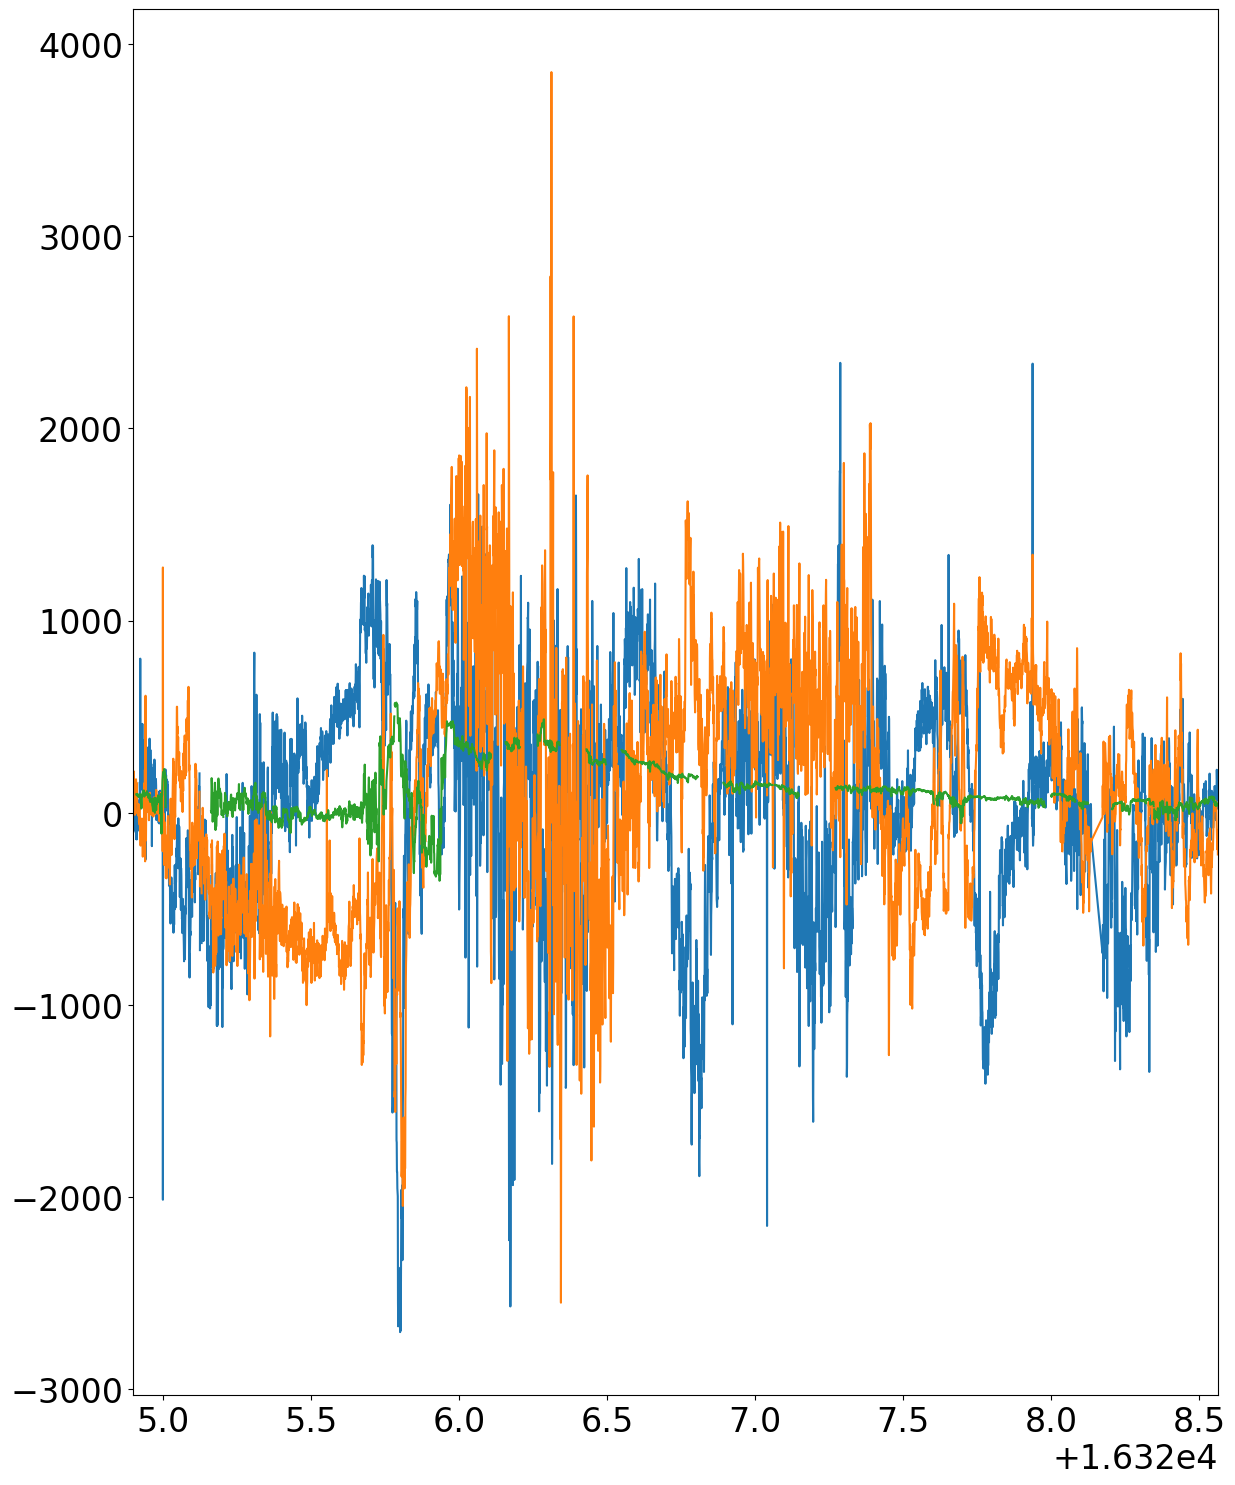

In [11]:
datadir = '/Users/alan/Downloads/AOS99/2014_09_11/'
lpfilename=datadir+'20140911.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20140911.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20140911.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2014-09-11.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)
df2.to_csv('2014-09-11.csv')

73836
73836
73836
73836
73836


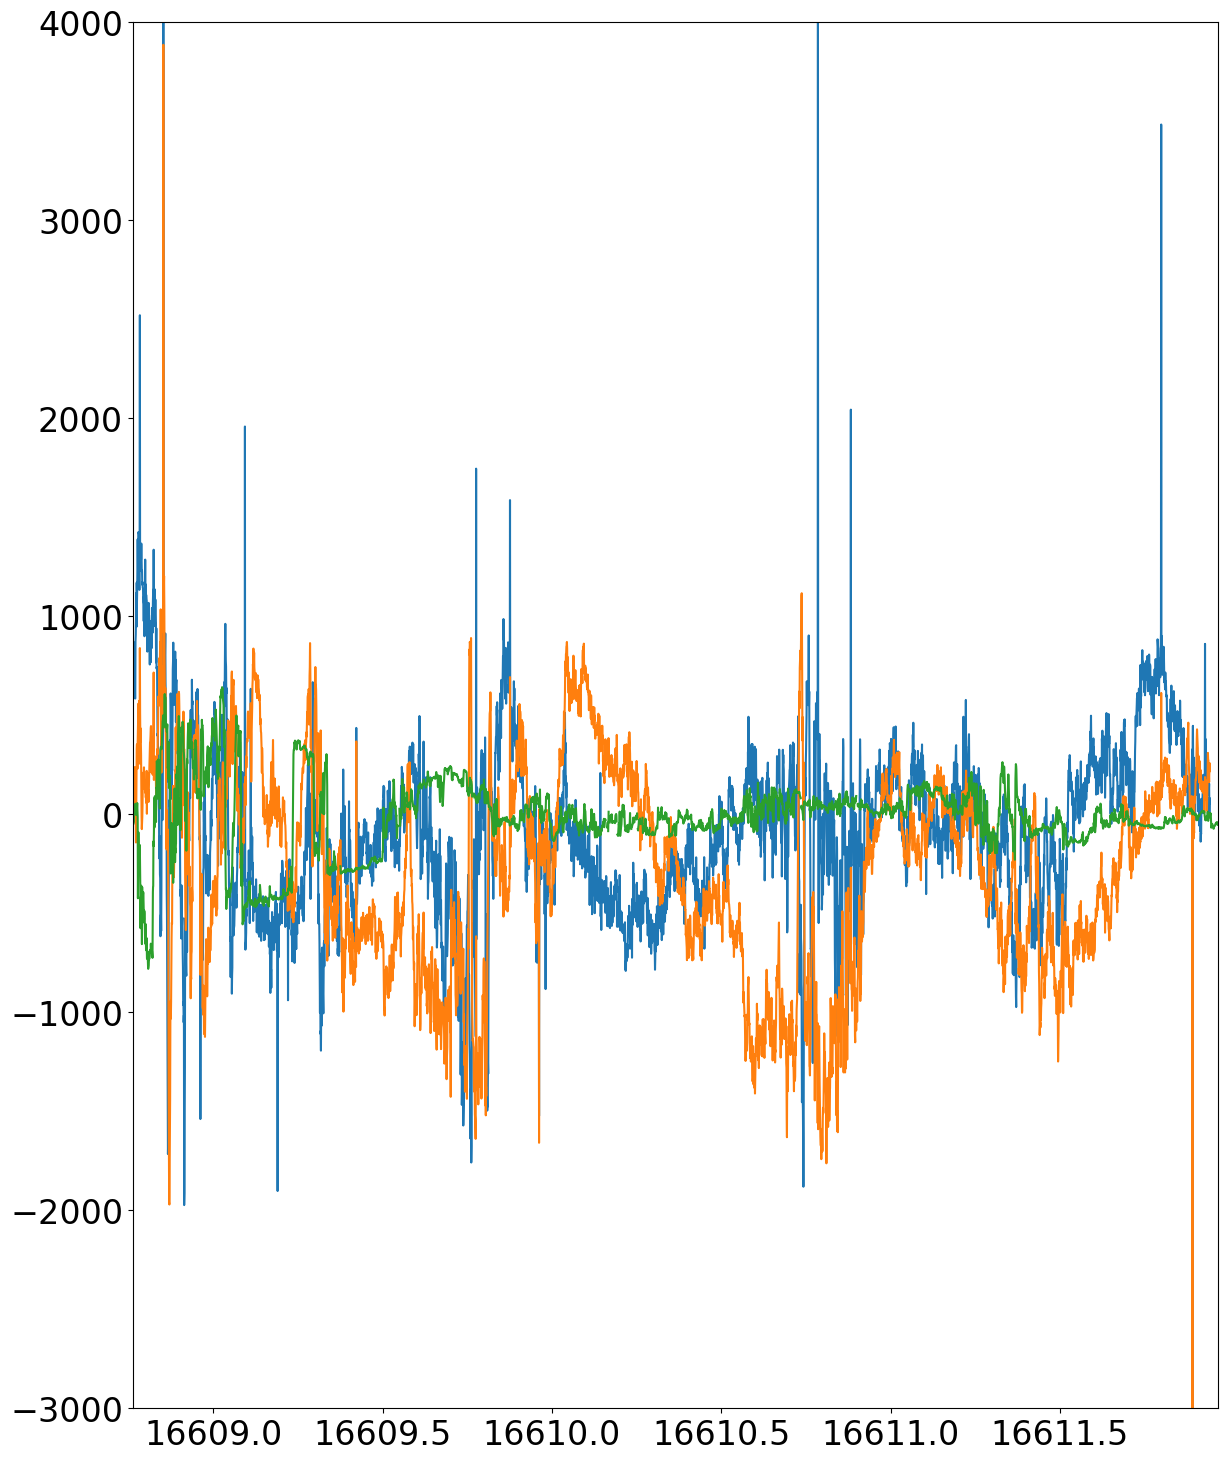

In [12]:
datadir = '/Users/alan/Downloads/AOS99/2015_06_22/'
lpfilename=datadir+'20150622.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20150622.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20150622.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2015-06-22.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))
plt.ylim(-3000,4000)

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)
df2.to_csv('2015-06-22.csv')

92122
92122
92122
92122
92122


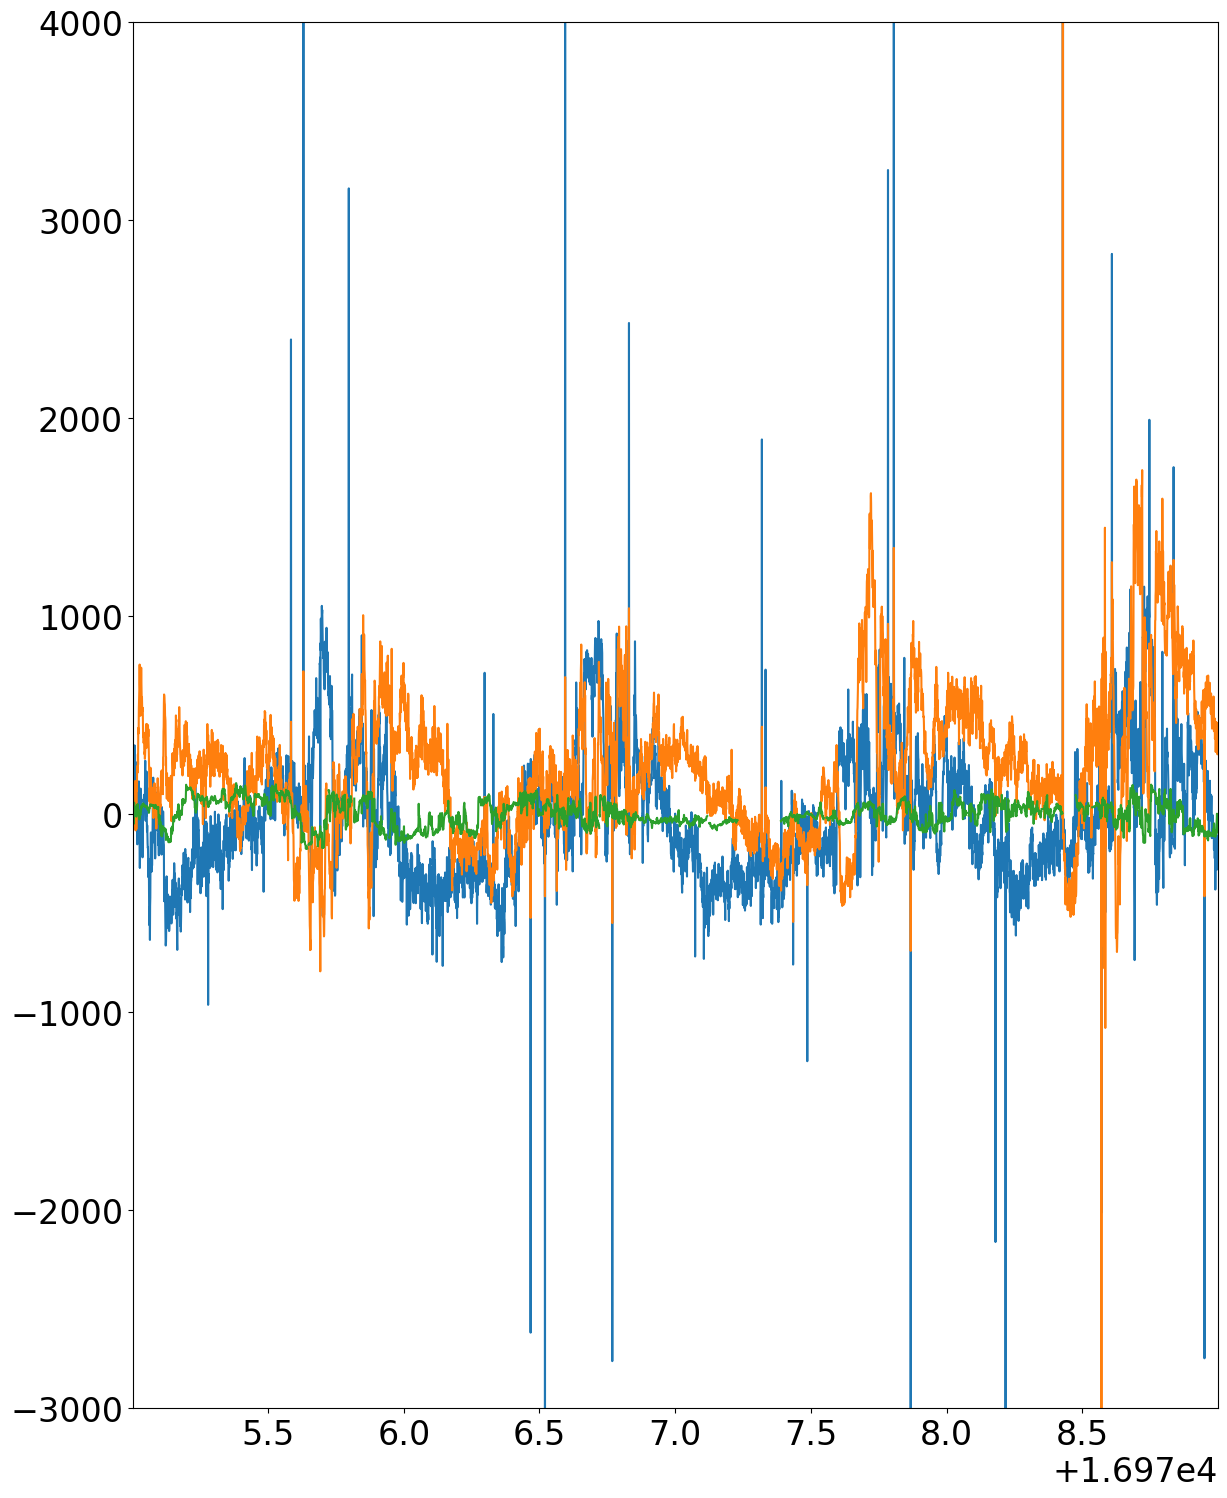

In [13]:
datadir = '/Users/alan/Downloads/AOS99/2016_06_23/'
lpfilename=datadir+'20160623.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20160623.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20160623.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2016-06-23.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))
plt.ylim(-3000,4000)

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)
df2.to_csv('2016-06-23.csv')

89151
89151
89151
89151
89151


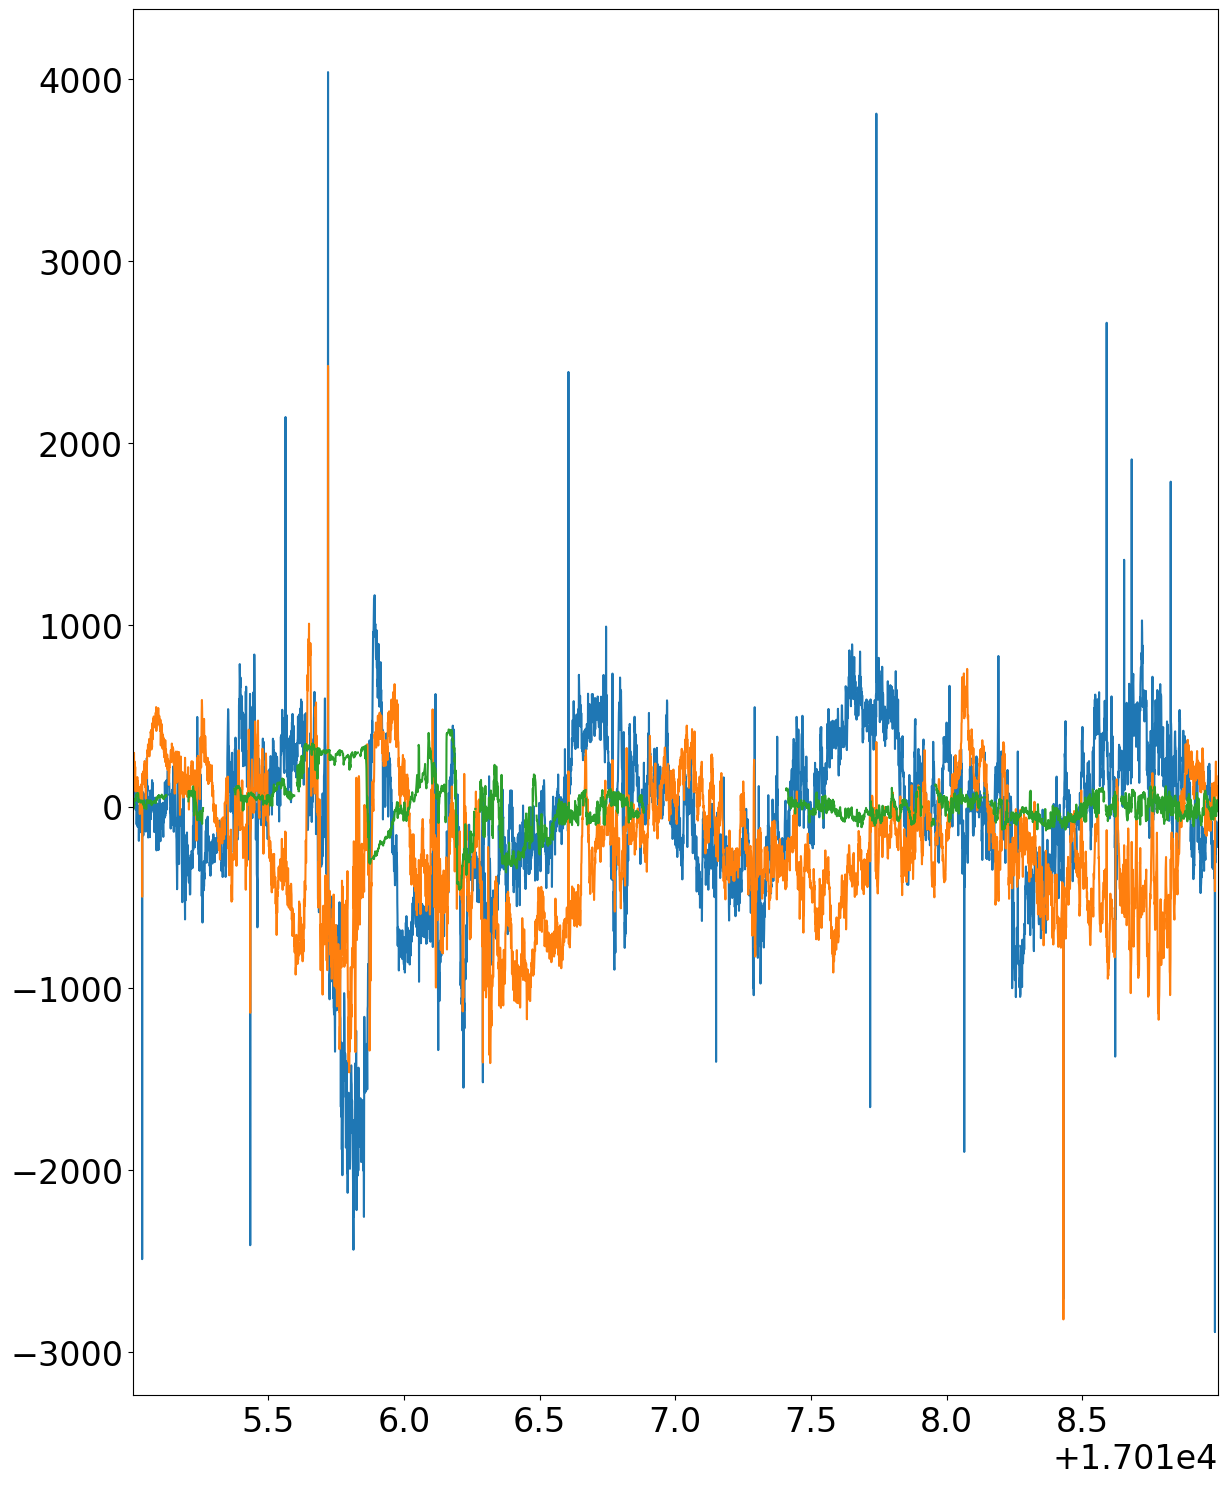

In [14]:
datadir = '/Users/alan/Downloads/AOS99/2016_08_02/'
lpfilename=datadir+'20160802.001_lp_1min-fitcal.h5'

#reconstructed vector velocities data file
vfilename=datadir+'20160802.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2016-08-02.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)
df2.to_csv('2016-08-02.csv')

21618
21618
21618
21618
21618


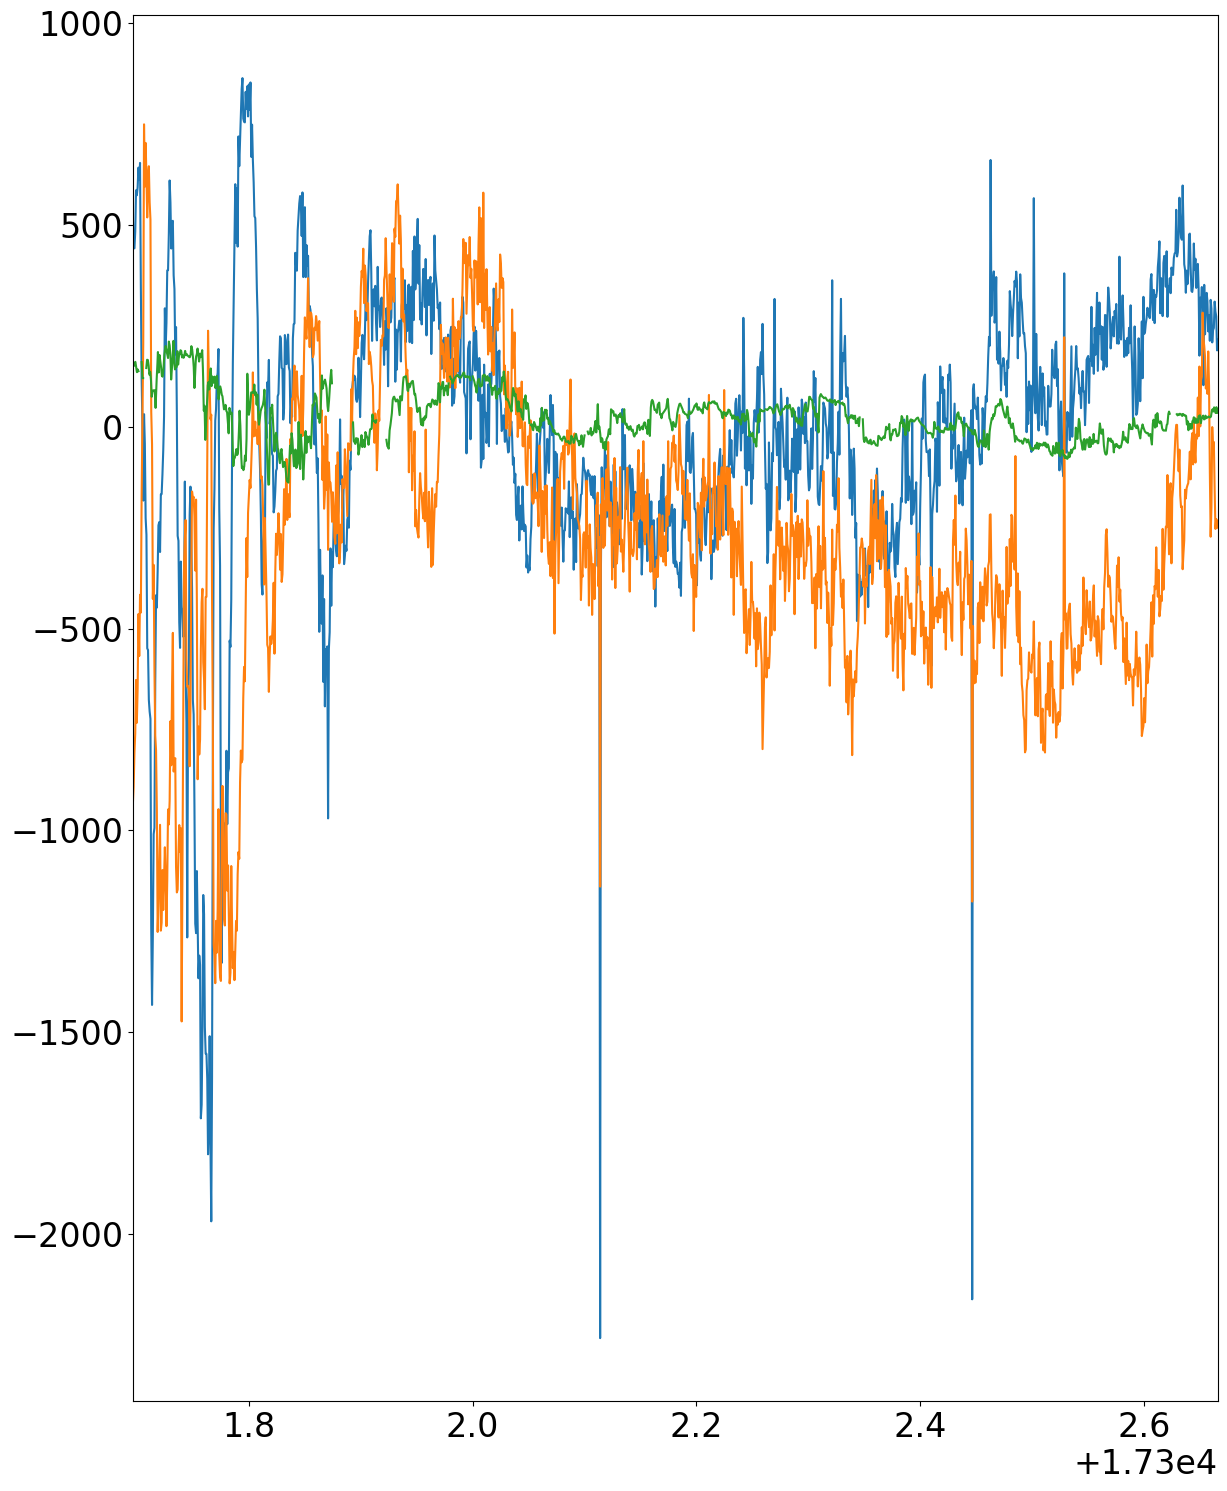

In [15]:
datadir = '/Users/alan/Downloads/AOS99/2017_05_15/'
lpfilename=datadir+'20170515.002_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20170515.002_ac_1min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20170515.002_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

df = pd.read_csv('2017-05-15.csv')

plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,0].T[5])
plt.plot(mdates.date2num(dtv),v['/VectorVels']['Vest'][:,:,1].T[5])
plt.plot(mdates.date2num(df['t']),df['ybz']*20)
plt.xlim(mdates.date2num(dtv[0]),mdates.date2num(dtv[-1]))

indicies = df.loc[(mdates.date2num(df['t']) >= mdates.date2num(dtv[0])) & (mdates.date2num(df['t']) <= mdates.date2num(dtv[-1]))]
indicies = indicies.drop(columns='Unnamed: 0')
indicies = indicies.reset_index()
indicies.to_csv('ind.csv')
print(len(indicies.index))
print(len(indicies['t']))
print(len(indicies['ybz']))
vn = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,0].T[4:6],axis=0))
ve = np.interp(mdates.date2num(indicies['t']),xp=mdates.date2num(dtv), fp=np.median(v['/VectorVels']['Vest'][:,:,1].T[4:6],axis=0))
print(len(vn))
print(len(ve))

data = {
    'index':indicies.index,
    't':indicies['t'],
    'ybz':indicies['ybz'],
    'Vvels_Vest_ns':vn,
    'Vvels_Vest_ew':ve,
}
df2 = pd.DataFrame(data)
df2.to_csv('2017-05-15.csv')